In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fact_df = pd.read_csv("cleaned-data/fact_table.csv")
store_df = pd.read_csv("cleaned-data/store_dim.csv")
time_df = pd.read_csv("cleaned-data/time_dim.csv")
item_df = pd.read_csv("cleaned-data/item_dim.csv",sep = ";", encoding='cp1252')
customer_df = pd.read_csv("cleaned-data/customer_dim.csv",sep = ";")
trans_df = pd.read_csv("cleaned-data/trans_dim.csv")

In [51]:
# fact table with the time the item was sold
merge_time_df = pd.merge(fact_df, time_df, on='time_key')
# fact table with the specific item description
fact_item_df = pd.merge(fact_df, item_df.drop(['unit_price', 'unit'], axis=1), on='item_key')
# fact table with the specific item description and the transaction details
fact_item_pay_df = pd.merge(fact_item_df, trans_df, on='payment_key')
# fact table with item description, transaction details, and the customer information
fact_item_pay_cust_df = pd.merge(fact_item_pay_df, customer_df, on='coustomer_key')

In [60]:
merged_data = pd.merge(
                merge_time_df, item_df.drop(['unit_price', 'unit'], axis=1), on='item_key'
            ).merge(
                trans_df, on='payment_key'
            ).merge(
                customer_df, on='coustomer_key'
            ).merge(
                store_df, on='store_key'
            )

In [98]:
merged_data.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit', 'unit_price', 'total_price', 'date', 'hour', 'day',
       'week', 'month', 'quarter', 'year', 'item_name', 'desc', 'man_country',
       'supplier', 'trans_type', 'bank_name', 'name', 'contact_no', 'nid',
       'division', 'district', 'upazila'],
      dtype='object')

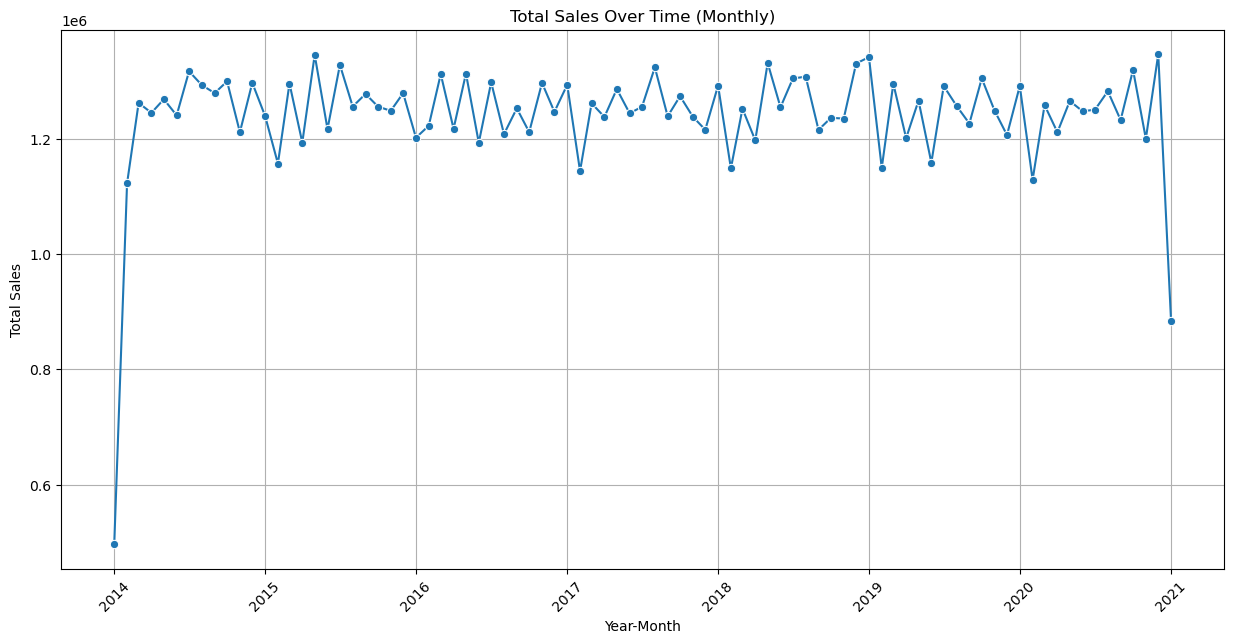

In [133]:
monthly_sales = merged_data.groupby(['year', 'month'])['total_price'].sum().reset_index()

monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(True)
plt.show()

                                 item_name  total_price
206                          Red Bull 12oz    1305700.0
119    K Cups Daily Chef Columbian Supremo    1245394.0
123  K Cups Original Donut Shop Med. Roast    1188843.0
120      K Cups Dunkin Donuts Medium Roast    1109760.0
161    Muscle Milk Protein Shake Van. 11oz    1050924.0
121        K Cups Folgers Lively Columbian    1042406.0
114                        Honey Packets      1012995.0
124        K Cups Ã± Starbuck's Pike Place     995456.0
125       K Cups Ã±Organic Breakfast Blend     957516.0
118          K Cups - McCafe Premium Roast     956886.0


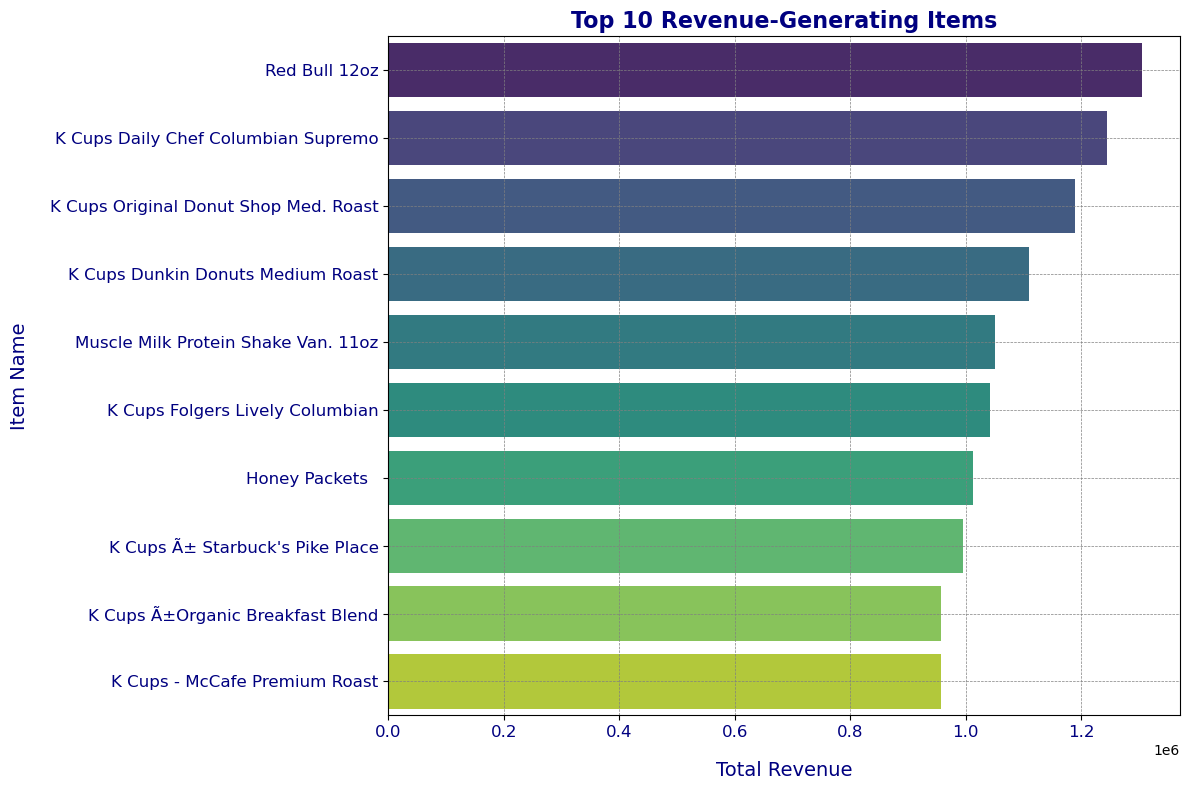

In [64]:
item_sales = merged_data.groupby('item_name')['total_price'].sum().reset_index()

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False)

print(top_items_by_sales.head(10))

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_price', y='item_name', data=top_items_by_sales, palette='viridis')

plt.title('Top 10 Revenue-Generating Items', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Total Revenue', fontsize=14, labelpad=15, color='navy')
plt.ylabel('Item Name', fontsize=14, labelpad=15, color='navy')
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()  
plt.show()

In [67]:
merged_data['division'].value_counts()

DHAKA         386888
CHITTAGONG    187340
RAJSHAHI      115075
KHULNA        107164
RANGPUR        79926
BARISAL        71444
SYLHET         52163
Name: division, dtype: int64

        division                              item_name  total_price
206      BARISAL                          Red Bull 12oz      95205.0
123      BARISAL  K Cups Original Donut Shop Med. Roast      86231.0
119      BARISAL    K Cups Daily Chef Columbian Supremo      83952.0
120      BARISAL      K Cups Dunkin Donuts Medium Roast      83376.0
121      BARISAL        K Cups Folgers Lively Columbian      76590.0
465   CHITTAGONG                          Red Bull 12oz     246510.0
378   CHITTAGONG    K Cups Daily Chef Columbian Supremo     235479.0
382   CHITTAGONG  K Cups Original Donut Shop Med. Roast     227370.0
420   CHITTAGONG    Muscle Milk Protein Shake Van. 11oz     202870.0
379   CHITTAGONG      K Cups Dunkin Donuts Medium Roast     201696.0
724        DHAKA                          Red Bull 12oz     510895.0
637        DHAKA    K Cups Daily Chef Columbian Supremo     474403.0
641        DHAKA  K Cups Original Donut Shop Med. Roast     470958.0
638        DHAKA      K Cups Dunki

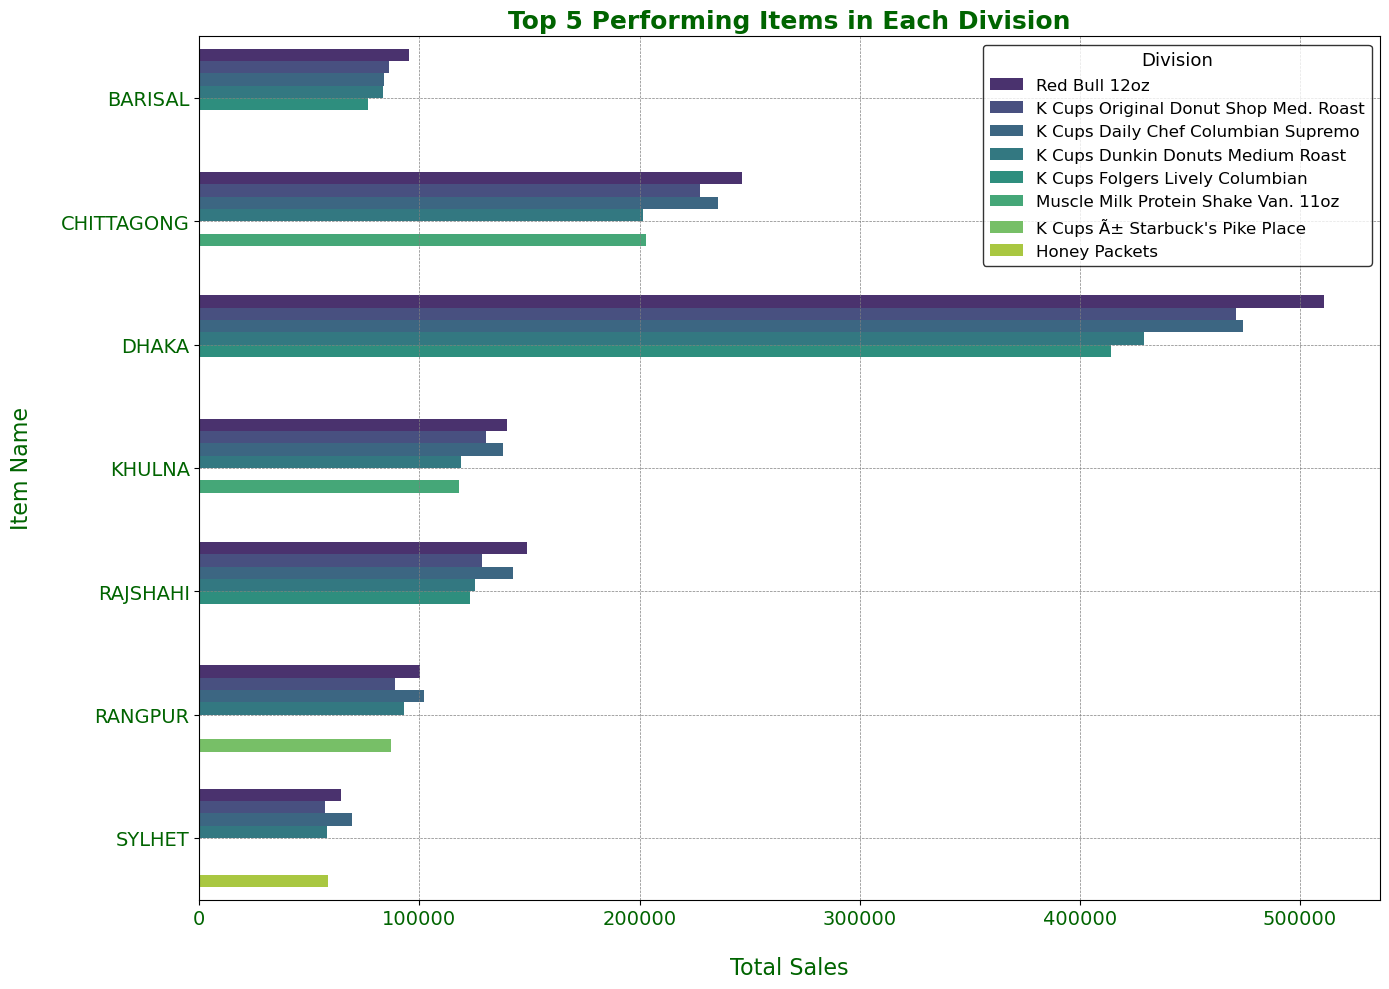

In [62]:
division_item_sales = merged_data.groupby(['division', 'item_name'])['total_price'].sum().reset_index()

# Sorting the items within each division by total sales in descending order
division_item_sales.sort_values(by=['division', 'total_price'], ascending=[True, False], inplace=True)

# Identifying the top 5 performing items in each division
top_5_items_in_division = division_item_sales.groupby('division').head(5)

# Displaying the top 5 performing items in each division
print(top_5_items_in_division)

# Creating a bar plot for top 5 items in each division with enhanced aesthetics
plt.figure(figsize=(14, 10))
sns.barplot(x='total_price', y='division', hue='item_name', data=top_5_items_in_division, palette='viridis')


plt.title('Top 5 Performing Items in Each Division', fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel('Total Sales', fontsize=16, labelpad=20, color='darkgreen')
plt.ylabel('Item Name', fontsize=16, labelpad=20, color='darkgreen')
plt.xticks(fontsize=14, color='darkgreen')
plt.yticks(fontsize=14, color='darkgreen')
plt.legend(title='Division', title_fontsize='13', fontsize='12', facecolor='white', edgecolor='black')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()  
plt.show()

In [78]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(monthly_sales['total_price'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -13.943720
p-value: 0.000000


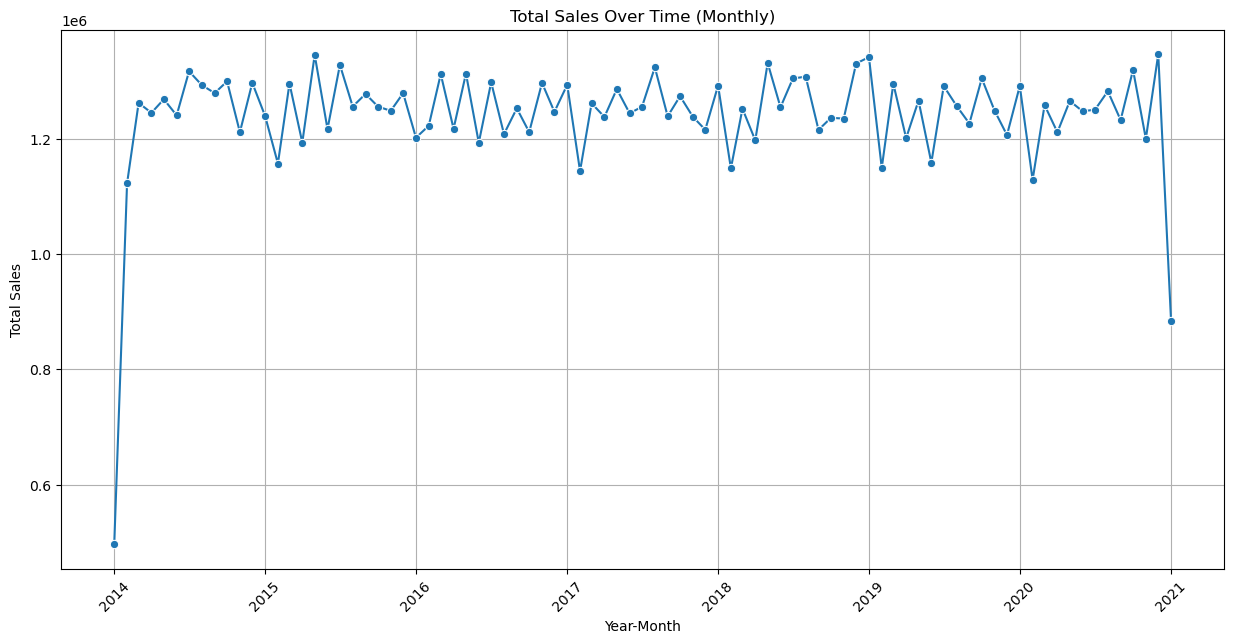

In [75]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()
#Common trend 

In [134]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales['total_price'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=10)

In [135]:
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[0:train_size], monthly_sales[train_size:len(monthly_sales)]

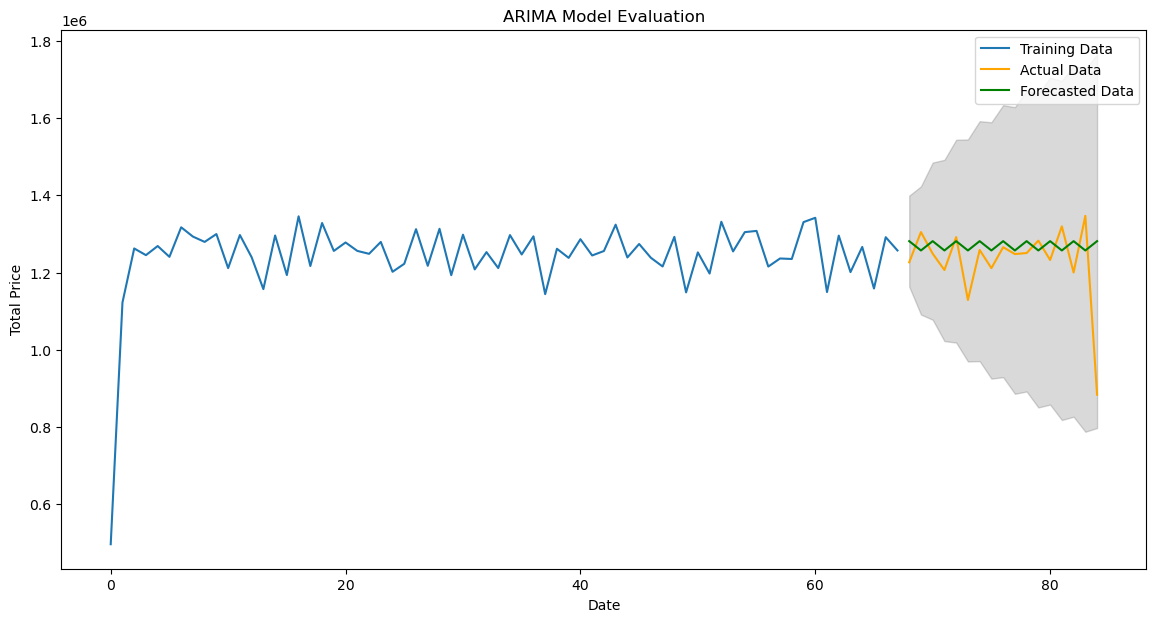

RMSE: 110886.56036253508


In [136]:
from sklearn.metrics import mean_squared_error

model_train = ARIMA(train['total_price'], order=(1, 1, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_price'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_price'], label='Training Data')
plt.plot(test['total_price'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

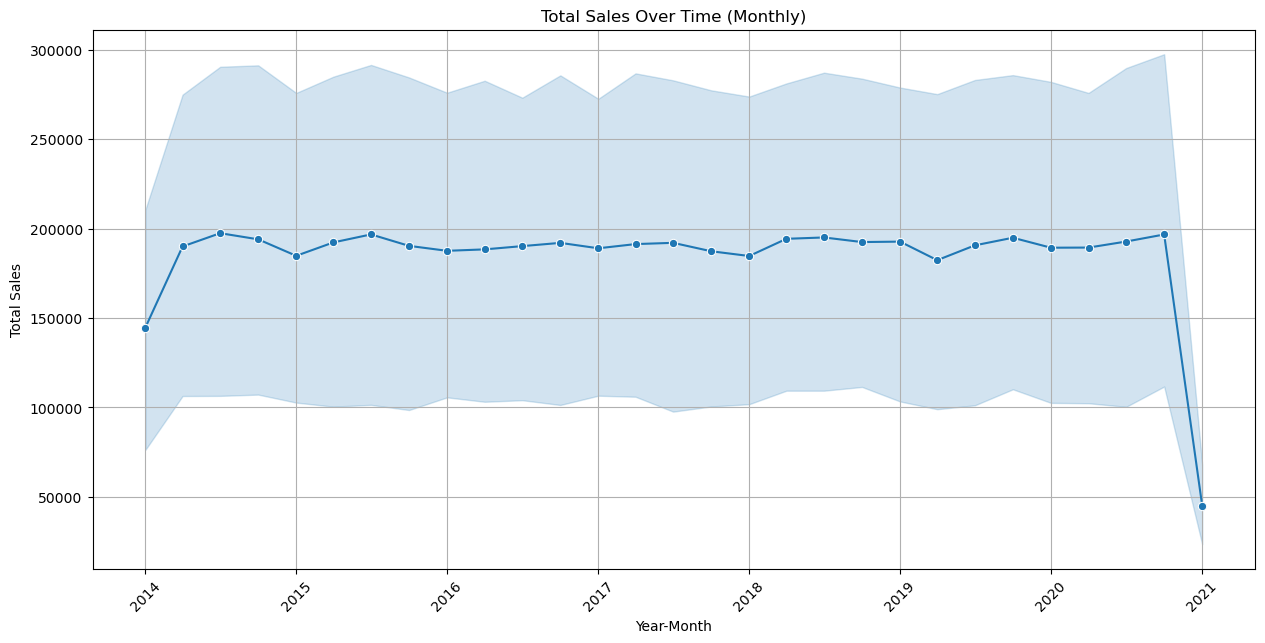

In [137]:
#Graph only with Food category
monthly_sales = merged_data.groupby(['year', 'quarter', 'desc'])['total_price'].sum().reset_index()
monthly_sales = monthly_sales[monthly_sales.desc.str.contains('Food')]
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['quarter'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

## Looking Forward...
* Quarter is better than monthly bases in terms of business trend
  - Maybe normalization would help?
* Try running ARIMA on one division only, find the trend
* Try running ARIMA on one category (desc)
* Honey Packet - While it one of the top sales, why is it only sold in one of the divisions?